<a href="https://colab.research.google.com/github/kylecata/kylecata/blob/main/sqc_homework_chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
from scipy.stats import lognorm
import statsmodels.graphics.gofplots as sm
import seaborn as sns
import scipy.stats as sc

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Table 6E3.csv to Table 6E3.csv
User uploaded file "Table 6E3.csv" with length 244 bytes


In [ ]:
import pandas as pd
data = pd.read_csv('Table 6E3.csv', sep=',', na_values=".")

#dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] < 31]]
#dataI= [data[['x1', 'x2', 'x3', 'x4']][data[0:11]]

#retrieve the Phase II data
#dataII= [data[['x1', 'x2', 'x3', 'x4']][data[11:19]]

#all data points; the data type is a list
dataAll=[data[['x1', 'x2', 'x3', 'x4']]]

dataAll

[    x1  x2  x3  x4
 0    6   9  10  15
 1   10   4   6  11
 2    7   8  10   5
 3    8   9   6  13
 4    9  10   7  13
 5   12  11  10  10
 6   16  10   8   9
 7    7   5  10   4
 8    9   7   8  12
 9   15  16  10  13
 10   8  12  14  16
 11   6  13   9  11
 12  16   9  13  15
 13   7  13  10  12
 14  11   7  10  16
 15  15  10  11  14
 16   9   8  12  10
 17  15   7  10  11
 18   8   6   9  12
 19  13  14  11  15]

In [ ]:
x=np.reshape(dataAll, (20,4))
x

array([[ 6,  9, 10, 15],
       [10,  4,  6, 11],
       [ 7,  8, 10,  5],
       [ 8,  9,  6, 13],
       [ 9, 10,  7, 13],
       [12, 11, 10, 10],
       [16, 10,  8,  9],
       [ 7,  5, 10,  4],
       [ 9,  7,  8, 12],
       [15, 16, 10, 13],
       [ 8, 12, 14, 16],
       [ 6, 13,  9, 11],
       [16,  9, 13, 15],
       [ 7, 13, 10, 12],
       [11,  7, 10, 16],
       [15, 10, 11, 14],
       [ 9,  8, 12, 10],
       [15,  7, 10, 11],
       [ 8,  6,  9, 12],
       [13, 14, 11, 15]])

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  20


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

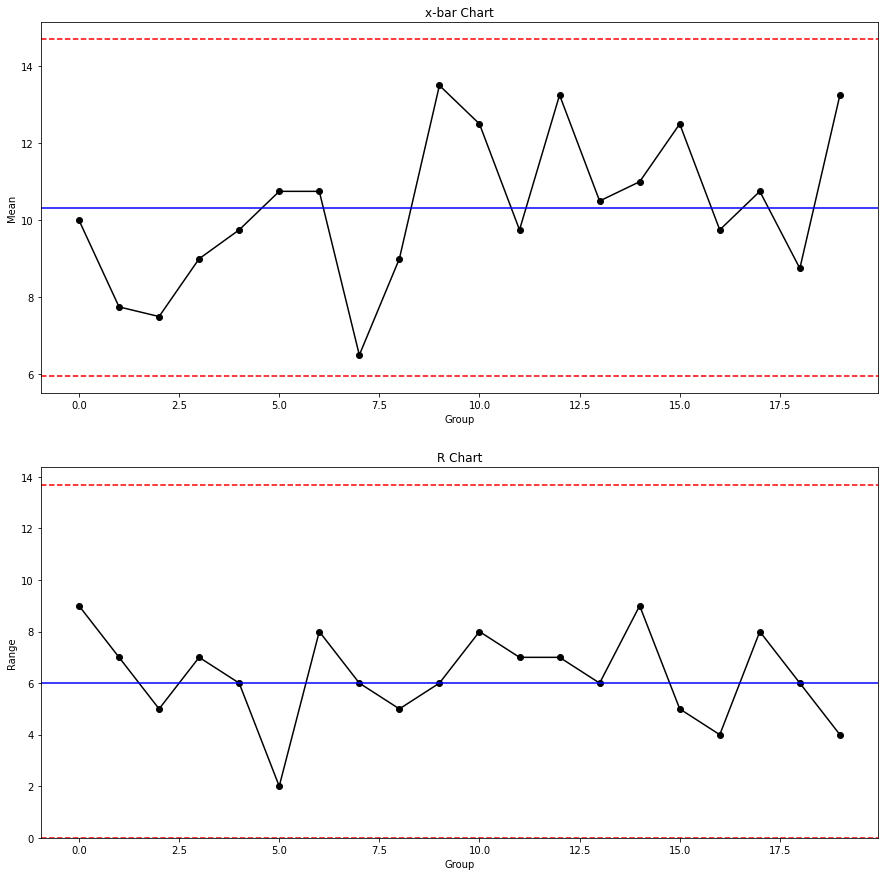

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=0.729 #n=4
D3=0     #n=4
D4=2.282 #n=4

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [ ]:
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [ ]:
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


6.8a
All of the points are within the control limits meaning this process is in statistical control.

In [ ]:
USL = 355
LSL = 345
Cp = (USL-LSL)/(6*np.std(dataAll))
Cp

0.5387744133583291

In [ ]:
m=np.mean(data)

sigma = np.std(data)

Cpk = np.min([(USL-m)/(3*sigma), (m-LSL)/(3*sigma)])
Cpk

-55.81360987095689

6.8b 
With a Cp value of 0.5387744133583291, it shows that the process spread  is larger than the specification limit meaning the process is not capable.

In [ ]:
a = list(data['x1'])

b = list(data['x2'])

c = list(data['x3'])

d = list(data['x4'])

import itertools
datalist = itertools.chain(a, b, c, d)
values = list(datalist)
values

[6,
 10,
 7,
 8,
 9,
 12,
 16,
 7,
 9,
 15,
 8,
 6,
 16,
 7,
 11,
 15,
 9,
 15,
 8,
 13,
 9,
 4,
 8,
 9,
 10,
 11,
 10,
 5,
 7,
 16,
 12,
 13,
 9,
 13,
 7,
 10,
 8,
 7,
 6,
 14,
 10,
 6,
 10,
 6,
 7,
 10,
 8,
 10,
 8,
 10,
 14,
 9,
 13,
 10,
 10,
 11,
 12,
 10,
 9,
 11,
 15,
 11,
 5,
 13,
 13,
 10,
 9,
 4,
 12,
 13,
 16,
 11,
 15,
 12,
 16,
 14,
 10,
 11,
 12,
 15]

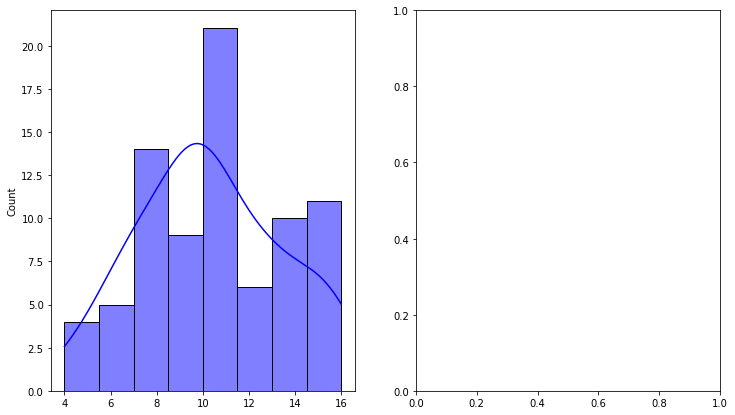

In [ ]:
sample_size = 20
standard_norm = np.random.normal(size=sample_size)

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(values,kde=True, color ='blue',ax=ax[0])
#sm.ProbPlot(values).qqplot(line='s', ax=ax[1])

6.8c 
The distribution of the voltage values in the histogram show that the voltage values are appoximately normally distributed.